In [60]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

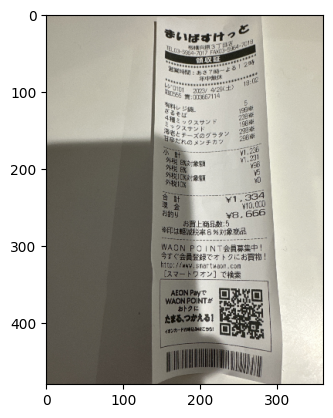

In [18]:
image = cv2.imread('./invoice_sample1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img = image.copy()
img = cv2.resize(img, (360, 480))

plt.imshow(img)

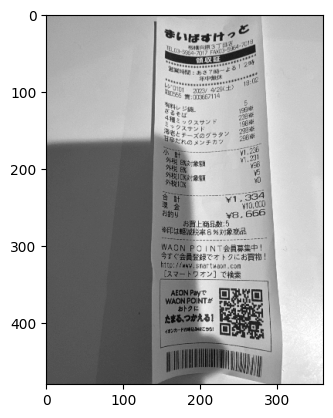

In [20]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

# Solution 1

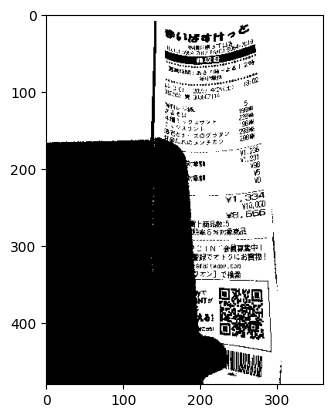

In [37]:
_, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY)
plt.imshow(otsu, cmap='gray')

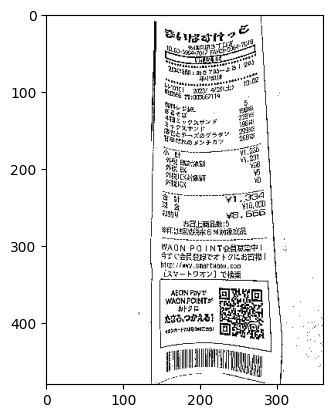

In [29]:
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=5, C=10)
plt.imshow(adaptive, cmap='gray')

Observer from above result, we will use "adaptiveThreshold" to adjust lighting issue.

# Solution 2

Origin post of this solution (https://stackoverflow.com/questions/44047819/increase-image-brightness-without-overflow/44054699#44054699)

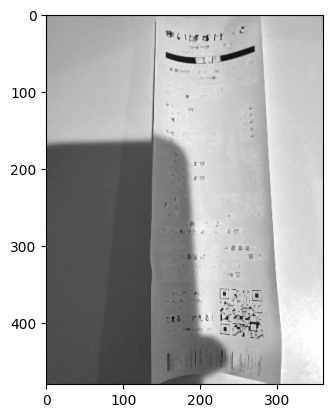

In [46]:
dilated = cv2.dilate(gray, np.ones((3,3), np.uint8))
plt.imshow(dilated, cmap='gray')

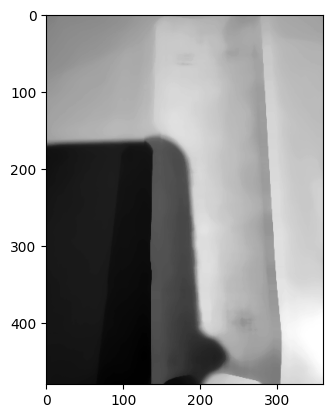

In [49]:
blur = cv2.medianBlur(dilated, 21)
plt.imshow(blur, cmap='gray')

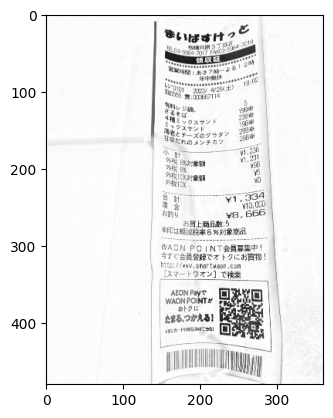

In [50]:
diff = 255 - cv2.absdiff(gray, blur)
plt.imshow(diff, cmap='gray')

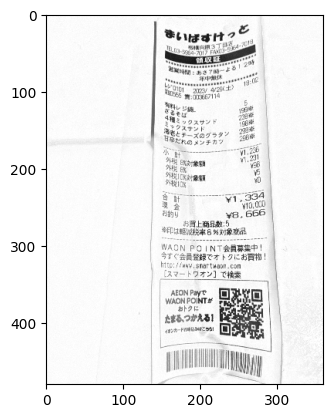

In [54]:
norm = diff.copy()
cv2.normalize(diff, norm, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
plt.imshow(norm, cmap='gray')

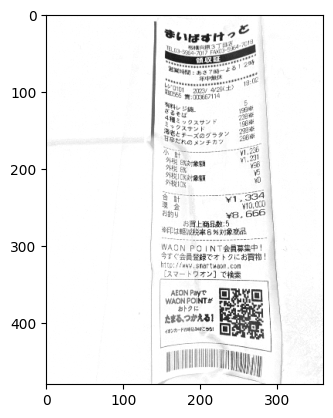

In [58]:
_, thresh_img = cv2.threshold(norm, 250, 0, cv2.THRESH_TRUNC)
cv2.normalize(thresh_img, thresh_img, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
plt.imshow(thresh_img, cmap='gray')